In [183]:
import numpy
import matplotlib.pyplot

In [243]:
class Linear_regression:
    def __init__(self,train_data_size):
        self.d=2
        self.N=train_data_size
        self.randomize_target_function()
        self.randomize_train_data()
        
        self.linear_regression()
        self.evaluate_e_in()
        
#         self.plot_everything()
        
        self.perceptron()
#         self.plot_hypothesis()
    
    def linear_regression(self):
        X=[t.T for t in self.x]
        X=numpy.reshape(X,(self.N,3))
        X_inv=numpy.linalg.pinv(X)
        self.w=numpy.dot(X_inv,self.y)
    
    def perceptron(self):
        wrong_answer_exists=True
        self.perceptron_steps=0
        while(wrong_answer_exists):
            random_start=0
            wrong_answer_exists=False
            while(random_start!=self.N):
                idx=numpy.random.randint(random_start,self.N)
                answer=numpy.sign(numpy.dot(self.w.T,self.x[idx]))
                answer=-1 if answer==0 or answer==-1 else 1
                if answer!=self.y[idx]:
                    wrong_answer_exists=True
                    self.w+=self.y[idx]*self.x[idx]
                    self.perceptron_steps+=1
                else:
                    self.x[random_start],self.x[idx]=self.x[idx],self.x[random_start]
                    self.y[random_start],self.y[idx]=self.y[idx],self.y[random_start]
                    random_start+=1
                    
    
    def evaluate_e_in(self):
        incorrect=0
        for i in range(self.N):
            answer = numpy.sign(numpy.dot(self.w.T,self.x[i]))
            answer = -1 if answer==0 or answer==-1 else 1
            if(answer!=self.y[i]):
                incorrect+=1
        self.e_in=incorrect/self.N
    
    def randomize_train_data(self):
        self.x=[]
        self.y=[]
        for i in range(self.N):
            self.x.append(numpy.array([1]+numpy.random.uniform(-1,1,2).tolist(),ndmin=2).T)
            self.y.append(self.target_function_value(self.x[-1][1],self.x[-1][2]))
        self.y=numpy.array(self.y,ndmin=2).T
        
    def target_function_value(self,x,y):
        original_y=self.target_function(x)
        return 1 if original_y<y else -1
    
    def randomize_target_function(self):
        x_points=numpy.random.uniform(-1,1,2)
        y_points=numpy.random.uniform(-1,1,2)
        polynomial = numpy.polyfit(x_points,y_points,1)
        self.target_function=numpy.poly1d(polynomial)
        
    def plot_everything(self):
        self.plot_target_function()
        self.plot_train_data()
        self.plot_hypothesis()
        
        matplotlib.pyplot.axis([-3,3,-3,3])
        matplotlib.pyplot.show()
        
    def plot_target_function(self):
        x_points=numpy.linspace(-1,1,100)
        y_points=self.target_function(x_points)
        matplotlib.pyplot.plot(x_points,y_points,label='Target')
        matplotlib.pyplot.legend()
    
    def plot_train_data(self):
        for i in range(self.N):
            if(self.y[i]==1):
                matplotlib.pyplot.plot(self.x[i][1],self.x[i][2],'g.')
            else:
                matplotlib.pyplot.plot(self.x[i][1],self.x[i][2],'r.')
                
    def plot_hypothesis(self):
        eqv = numpy.poly1d([-self.w[1][0]/self.w[2][0],-self.w[0][0]/self.w[2][0]])
        x_points=numpy.linspace(-1,1,100)
        y_points=eqv(x_points)
        
        matplotlib.pyplot.plot(x_points,y_points,label='g')
        matplotlib.pyplot.legend()

In [184]:
cycles=1000
N=100

e_in=0.
g=[]
f=[]
for i in range(cycles):
    a = Linear_regression(N)
    e_in+=a.e_in
    g.append(a.w)
    f.append(a.target_function)
e_in/=cycles

In [185]:
# Evaluate e_out
def correct_position(poly,x,y):
    original_y=poly(x)
    return 1 if original_y<y else -1

test_data_size=1000
e_out=0.
for i in range(cycles):
    incorrect=0
    test_points_x=numpy.random.uniform(-1,1,test_data_size)
    test_points_y=numpy.random.uniform(-1,1,test_data_size)
    for j in range (test_data_size):
        correct_answer = correct_position(f[i],test_points_x[j],test_points_y[j])
        answer = numpy.sign(numpy.dot(g[i].T,[1,test_points_x[j],test_points_y[j]]))
        answer = -1 if answer==0 or answer==-1 else 1
        if(answer!=correct_answer):
            incorrect+=1
    e_out+=incorrect/test_data_size
e_out/=cycles

0.049839


In [187]:
print(e_in)
print(e_out)

0.03953000000000015
0.049839


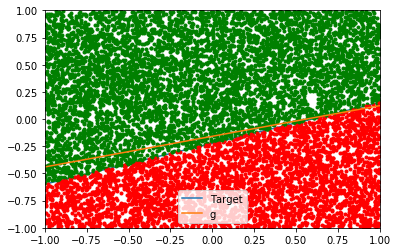

In [191]:
Linear_regression(10000)

In [256]:
# Linear regression + perceptron
cycles=20000
data_size=10

total_steps=0.
for i in range(cycles):
    b=Linear_regression(data_size)
    total_steps+=b.perceptron_steps
total_steps/=cycles

In [257]:
print(total_steps)

9.0565
